In [48]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
# 设置随机数种子
np.random.seed(42)

# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# 定义PCA降维，以便于可视化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# PCA降维
pca = PCA(n_components=2)  # 保留2个主成分（因为平面散点图只有两个坐标轴）
pca = pca.fit(X_scaled)

In [51]:
X_train[:5]

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5]])

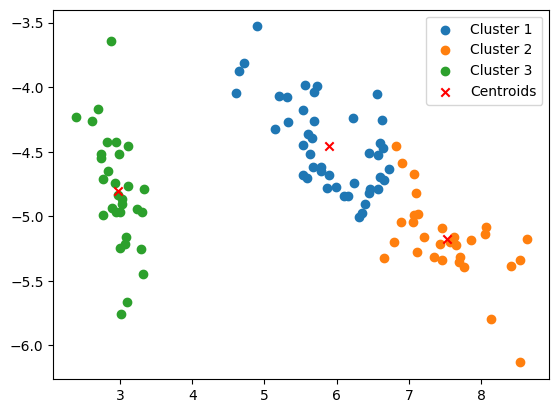

In [55]:
# 设置K
K = 3

# 设置迭代次数
iters = 20

# 随机选择簇中心
samples = np.random.choice(range(len(X_train)), size=K)
centroids = X_train[samples]

# 初始化每个点的类别
labels = np.zeros(len(X_train))

# K-means聚类
for i in range(iters):
    # 为每个点分配其最近的中心
    for j in range(len(X_train)):
        distances = np.linalg.norm(centroids - X_train[j], axis=1)  # 欧拉距离
        labels[j] = np.argmin(distances, axis=0)                    # 更新类别
    # 更新每个簇中心
    for k in range(K):
        centroids[k] = X_train[labels == k].mean(axis=0)
        
    # 可视化聚类中心
    clear_output(wait=True)  # 清除之前的输出
    for k in range(K):
        cluster_points = X_train[labels == k]
        # PCA降维，便于可视化到平面坐标上
        cluster_points = pca.transform(cluster_points)
        centroids_points = pca.transform(centroids)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')
    plt.scatter(centroids_points[:, 0], centroids_points[:, 1], c='red', marker='x', label='Centroids')    # 绘制质心
    plt.legend()
    plt.show()
    time.sleep(0.5)

In [56]:
# 测试样例数据
example_train = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [5.0, 3.6, 1.4, 0.2],
    [7.0, 3.2, 4.7, 1.4],
    [6.9, 3.1, 4.9, 1.5],
    [5.7, 2.5, 5.0, 2.0],
    [5.8, 2.8, 5.1, 2.4]
])

example_test = np.array([4.8, 3.0, 1.1, 0.1])

In [57]:
# 样例的训练集类别
for et in example_train:
    distances = np.linalg.norm(centroids - et, axis=1)
    print(f'训练样例 {et} 的类别:', np.argmin(distances, axis=0))

distance = np.linalg.norm(centroids - example_test, axis=1)
print(f'\n测试样例 {et} 的类别:', np.argmin(distance, axis=0))

训练样例 [5.1 3.5 1.4 0.2] 的类别: 2
训练样例 [5.  3.6 1.4 0.2] 的类别: 2
训练样例 [7.  3.2 4.7 1.4] 的类别: 1
训练样例 [6.9 3.1 4.9 1.5] 的类别: 1
训练样例 [5.7 2.5 5.  2. ] 的类别: 0
训练样例 [5.8 2.8 5.1 2.4] 的类别: 1

测试样例 [5.8 2.8 5.1 2.4] 的类别: 2
